<a href="https://colab.research.google.com/github/luigiselmi/dl_tensorflow/blob/main/epfl_building_footprints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Photovoltaic detection
We use the data from [Cadei et al - Detecting available rooftop area from satellite images to install photovoltaic panels](https://github.com/riccardocadei/photovoltaic-detection/tree/main) to implement a semantic segmentation model for the extraction of building footprints from satellite images.

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
cd /content/drive/MyDrive/EPFL_Building_Footprints/data/all

/content/drive/.shortcut-targets-by-id/1iI1BCISUNA2rFEKBXNV6SD_pTBTlXqv9/data/all


In [4]:
ls

test/  train/  val/


In [5]:
cd train/images

/content/drive/.shortcut-targets-by-id/1iI1BCISUNA2rFEKBXNV6SD_pTBTlXqv9/data/all/train/images


In [6]:
ls |wc -l

420


In [7]:
import os
import matplotlib.pyplot as plt
from skimage import io
from skimage import exposure
from skimage.io import imsave, imread
import warnings
warnings.filterwarnings('ignore')


In [8]:
def create_list(footprints_path):
    """
    This function extracts the building footprints images from
    all the patches of a subset image in the patches folder
    """
    img_list = []
    for file in os.listdir(footprints_path):
        if file.endswith(".png"):
            img_list.append(os.path.join(footprints_path, file))

    return img_list

In [9]:
footprints_list = create_list('/content/drive/.shortcut-targets-by-id/1iI1BCISUNA2rFEKBXNV6SD_pTBTlXqv9/data/all/train/images')
len(footprints_list)

420

In [10]:
img_0 = io.imread(footprints_list[0])
img_0.shape

(250, 250, 3)

In [16]:
def plot_raster(ax, list_images):
  index = 0
  for col in range(0, fig_cols):
    for row in range(0, fig_rows):
      img_natcol = io.imread(list_images[index])
      img_equalized = exposure.equalize_hist(img_natcol)
      ax[row, col].set_axis_off()
      ax[row, col].imshow(img_equalized)
      index += 1

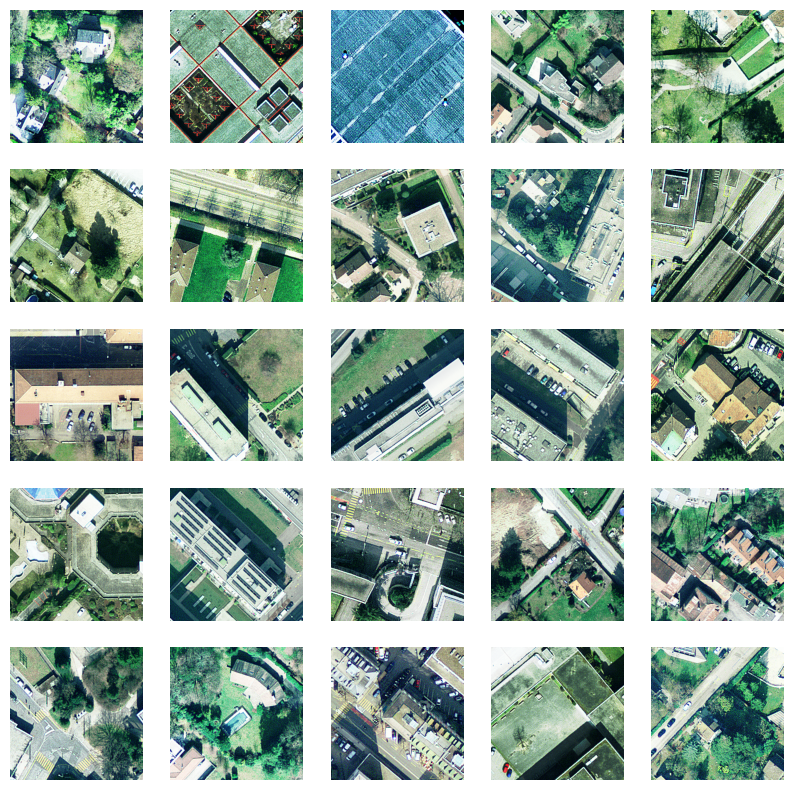

In [17]:
fig_rows = 5
fig_cols = 5
fig, ax = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(10, 10))
plot_raster(ax, footprints_list)


In [13]:
labels_list = create_list('/content/drive/.shortcut-targets-by-id/1iI1BCISUNA2rFEKBXNV6SD_pTBTlXqv9/data/all/train/labels')
len(labels_list)

420

In [15]:
label_0 = io.imread(labels_list[0])
label_0.shape

(250, 250, 3)

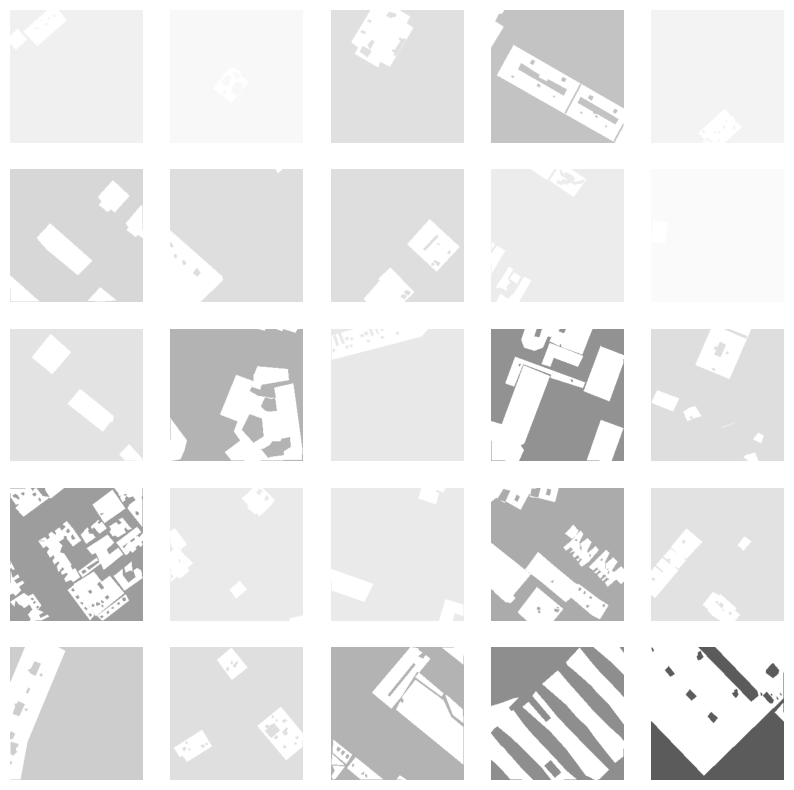

In [18]:
fig, ax = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=(10, 10))
plot_raster(ax, labels_list)